In [72]:
import pandas as pd
from konlpy.tag import Okt
pd.set_option('display.max_rows', None)

In [73]:
import pandas as pd
pd.options.display.max_rows = 3000
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 텍스트 전처리
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from konlpy.tag import Okt 
#import MeCab
#mecab = MeCab.Tagger()
import re 
from string import punctuation
import requests
import pickle
import ast

# 토픽모델링
import gensim
from gensim import corpora, models
from gensim.models import CoherenceModel
import pyLDAvis 
import pyLDAvis.gensim

In [74]:
## 리뷰 불러오기
df = pd.read_csv("D:/review_df_.csv")

In [75]:
df.shape

(2871, 5)

In [76]:
df.head(3)

,Unnamed: 0,DATE,STAR,REVIEW,LIKE
0,0,2020-01-07,1,오류거지같음 쓸때마다 앱자체 오류도 많이 나고 이용자수 많다면서 결제도 안되고 툭하...,0
1,1,2020-01-07,5,국굿 아이폰 바코드나 큐알코드 결제만 앱에서 가능 하면 최고일것 같아요,0
2,2,2020-01-07,3,어플 팅김현상 2월달부터 잘 사용하다가 오늘 업데이트를 했는데 어플 접속이 안됩니다...,0


In [77]:
del df['Unnamed: 0'] # Unnamed 행 삭제

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2871 entries, 0 to 2870
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2871 non-null   object
 1   STAR    2871 non-null   int64 
 2   REVIEW  2871 non-null   object
 3   LIKE    2871 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 89.8+ KB


In [79]:
## 긍정 = 별점 1,2 / 부정 = 별점 4,5 
## 4월이전 = 날짜 2021.04.05 이전 이후로 구분
corpus = df['REVIEW']
corpus
# ## ex)4월을 기준으로 나누기
# before_4 = df['2019-12-27' : '2021-03-31']
# after_4 = df['2021-04-01': '2021-7-23']
# ## 긍정 부정 나누기
# data_positive = df[df['STAR'] > 3] # 긍정 리뷰
# data_negative = df[df['STAR'] < 3] # 부정 리뷰

0       오류거지같음 쓸때마다 앱자체 오류도 많이 나고 이용자수 많다면서 결제도 안되고 툭하...
1                 국굿 아이폰 바코드나 큐알코드 결제만 앱에서 가능 하면 최고일것 같아요
2       어플 팅김현상 2월달부터 잘 사용하다가 오늘 업데이트를 했는데 어플 접속이 안됩니다...
3       동백전 어플설치 저는 아이폰이라 설치를 했지만, 아버지도 동백전 어플 설치해드리려고...
4       개선사항 요청하고 싶습니다! 본인 인증 수단을 공인인증서도 추가 하였으면 좋겠습니다...
5       ㅠ 주민등록증 찍는데 청소년들은 청소년증으로 하라해서 청소년증 찍고 발급날짜 했는데...
6         불안정한 앱 이용내역 확인 시 강제종료 앱 메뉴도 간단하고 동백전 서비스도 훌륭한데 
7       앱 꺼짐 문제 앱 들어가서 캐쉬백을 누르면 앱이 꺼져버리는데 어떻게 해야되나요? 다...
8                      안들어가져요 업데이트 했는데 안들어가져요.. 해결 좀 해주세여
9       고객 서비스가 최악이네요 어플 오류로 인하여 충전 하려고 하니 바탕화면으로 팅기는데...
10      왜때문에 인증이안되나효 내이름에 내 탄생일에 내 명의의 핸드폰번혼데 자꾸 확인하래 ...
11      동백점 미가맹점 결제 가능 요청 잘 사용중입니다. 감사합니다^^* 다만 동백점 미가...
12      카드신청안됨 다 하고 마지막에 계속 오류가 나요ㅠ 청구서 수령관련 등록을 해야된다는...
13                                 아이폰 X 충전안됨 충전하러 가면 튕겨요
14      오류 갑자기 오늘 접속오류 계속 뜨길래 삭제 후 다시 깔았더니 아예 안되네요; 빠른...
15       돈 넣었는데 어플 실행이 안돼요 ? 잘 쓰다가 돈 남아있는데 어플 실행이 안돼요 뭔데요
16                            503오류 뜨면서 실행안되네요 우째해야되나요ㅡ.ㅡ
17      갑자기 서비

In [80]:
corpus_list = list(corpus)
corpus_list[0:3]

['오류거지같음 쓸때마다 앱자체 오류도 많이 나고 이용자수 많다면서 결제도 안되고 툭하면 점검들어간다하고 동백전에 돈 충전해서 체크카드에서 출금이 됬는데 동백전에는 충전금액 뜨지도 않네요-_- 내 돈은 어디로 간거임 ㅈㄴ 별1개도 아까움',
 '국굿 아이폰 바코드나 큐알코드 결제만 앱에서 가능 하면 최고일것 같아요',
 '어플 팅김현상 2월달부터 잘 사용하다가 오늘 업데이트를 했는데 어플 접속이 안됩니다 어플 누르면 동백전 화면 뜨고 1초뒤 바탕화면으로 팅겨버려요']

In [81]:
import re
def message_cleaning(docs):

  
   
    # Series의 object를 str로 변경.
    docs = [str(doc) for doc in docs]
    
    
    # 2. 자음 모음 제거하기
    pattern2 = re.compile("[ㄱ-ㅎ]*[ㅏ-ㅢ]*")
    docs = [pattern2.sub("", doc) for doc in docs]
    # 3. 특수문자 제거
    pattern4 = re.compile("[\{\}\[\]\/?.,;:'|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")
    docs = [pattern4.sub("", doc) for doc in docs]
    
    
    return docs

def define_stopwords(path):
    
    SW = set()
    # 불용어를 추가하는 방법 1.
#     SW.add("동백전")
    
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가
    
    with open(path) as f:
        for word in f:
            SW.add(word[:-1])
            
    return SW

# 명사만 추출 

def noun_tokenizer(c):
    
    okt = Okt() # 따로 다른 변수에 선언해야 함

    noun = []

    for i in range(len(c)):
        try:
            noun.append(okt.nouns(c[i]))
        except Exception as e:
            continue
    
    return noun

<>:14: DeprecationWarning: invalid escape sequence \{
<>:14: DeprecationWarning: invalid escape sequence \{
<>:14: DeprecationWarning: invalid escape sequence \{
<ipython-input-81-b0eda52a4fb6>:14: DeprecationWarning: invalid escape sequence \{
  pattern4 = re.compile("[\{\}\[\]\/?.,;:'|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]")


In [82]:
SW = define_stopwords("D:/stopwords-ko.txt")
SW

{'결하',
 '가',
 '이젠',
 '동안',
 '이라고',
 '위해서',
 '중이',
 '금앱',
 '리세',
 '이었다',
 '아이쿠',
 '훨씬',
 '즉시',
 '의해되다',
 '전후',
 '하도다',
 '안남',
 '아지',
 '다카',
 '어디',
 '좍좍',
 '줄은모른다',
 '총적으로',
 '으로',
 '다만',
 '왜또',
 '불도',
 '대합',
 '인트',
 '역도',
 '요만한걸',
 '다해',
 '이 되다',
 '우리들',
 '글쎄요',
 '거나',
 '항만',
 '이리하여',
 '대만',
 '둥둥',
 '연관되다',
 '이렇게말하자면',
 '분도',
 '하면 할수록',
 '고지',
 '본대로',
 '이렇게되면',
 '한 까닭에',
 '해요',
 '일등',
 '일반적으로',
 '나',
 '로써',
 '또',
 '할수있어',
 '을해',
 '보가',
 '이군',
 '니요',
 '거바',
 '어느',
 '힘입어',
 '을시',
 '바꾸어말하자면',
 '아주',
 '잠시',
 '하하',
 '라진',
 '말할것도 없고',
 '천은',
 '더불어',
 '카드뱌아',
 '전보',
 '처사',
 '이구',
 '페이도',
 '따로따로',
 '지네',
 '참',
 '성적',
 '관계가 있다',
 '치질',
 '바하',
 '토하다',
 '저',
 '하니',
 '쓸껀데',
 '휴',
 '개탄',
 '관한',
 '남아',
 '이면',
 '은어',
 '할껀데',
 '던데',
 '로서',
 '여기',
 '보이지',
 '콸콸',
 '하더라도',
 '어감',
 '야',
 '대하여',
 '개색',
 '개똥',
 '어사',
 '이권',
 '것들',
 '그래도',
 '해주시',
 '대하면',
 '금은',
 '다른',
 '기대여',
 '그들',
 '라서',
 '안대',
 '그런데',
 '아야',
 '그리고',
 '하면서',
 '겸사겸사',
 '금고',
 '그러니까',
 '간정',
 '난린데',
 '저희',
 '지만원',
 '어떤',
 '이와 같은',
 '오',
 '조차

In [83]:
!pip install customized_konlpy 


In [84]:

from ckonlpy.tag import Twitter
twitter = Twitter()

twitter.add_dictionary('동백전', 'Noun')
twitter.add_dictionary('하나은행', 'Noun')
twitter.add_dictionary('부산은행', 'Noun')
twitter.add_dictionary('안드로이드', 'Noun')
twitter.add_dictionary('아이폰', 'Noun')
twitter.add_dictionary('갤럭시', 'Noun')
twitter.add_dictionary('삼성페이', 'Noun')
twitter.add_dictionary('카카오뱅크', 'Noun')
twitter.add_dictionary('뱅크샐러드', 'Noun')
twitter.add_dictionary('뱅크 샐러드', 'Noun')
twitter.add_dictionary('업데이트', 'Noun')
twitter.add_dictionary('업뎃', 'Noun')
twitter.add_dictionary('업그레이드', 'Noun')
twitter.add_dictionary('캐시백', 'Noun')
twitter.add_dictionary('캐쉬백', 'Noun')
twitter.add_dictionary('페이백', 'Noun')
twitter.add_dictionary('케이티', 'Noun')
twitter.add_dictionary('교통카드', 'Noun')
twitter.add_dictionary('10프로', 'Noun')
twitter.add_dictionary('10 프로', 'Noun')
twitter.add_dictionary('6프로', 'Noun')
twitter.add_dictionary('6 프로', 'Noun')
twitter.add_dictionary('재발급', 'Noun')
twitter.add_dictionary('지역화페', 'Noun')
twitter.add_dictionary('지역 화폐', 'Noun')
twitter.add_dictionary('고객센터', 'Noun')
twitter.add_dictionary('고객 센터', 'Noun')
twitter.add_dictionary('코나아이', 'Noun')
twitter.add_dictionary('본인인증', 'Noun')
twitter.add_dictionary('본인 인증', 'Noun')
twitter.add_dictionary('부산시', 'Noun')
twitter.add_dictionary('부산광역시', 'Noun')
twitter.add_dictionary('인터페이스', 'Noun')
twitter.add_dictionary('오프라인', 'Noun')
twitter.add_dictionary('온라인', 'Noun')
twitter.add_dictionary('회원가입', 'Noun')
twitter.add_dictionary('비번', 'Noun')
twitter.add_dictionary('비밀번호', 'Noun')
twitter.add_dictionary('아이디', 'Noun')
twitter.add_dictionary('전화번호', 'Noun')
twitter.add_dictionary('폰번호', 'Noun')
twitter.add_dictionary('생년월일', 'Noun')
twitter.add_dictionary('폰 번호', 'Noun')
twitter.add_dictionary('홈페이지', 'Noun')
twitter.add_dictionary('가맹점', 'Noun')
twitter.add_dictionary('운영사', 'Noun')
twitter.add_dictionary('소상공인', 'Noun')
twitter.add_dictionary('지원금', 'Noun')
twitter.add_dictionary('로코', 'Noun')
twitter.add_dictionary('이벤트', 'Noun')
twitter.add_dictionary('큐알', 'Noun')
twitter.add_dictionary('큐알코드', 'Noun')
twitter.add_dictionary('큐알 코드', 'Noun')
twitter.add_dictionary('큐알 코드', 'Noun')
twitter.add_dictionary('공지사항', 'Noun')
twitter.add_dictionary('공지 사항', 'Noun')
twitter.add_dictionary('불안정', 'Noun')
twitter.add_dictionary('어수선', 'Noun')
twitter.add_dictionary('번거로움', 'Noun')
twitter.add_dictionary('직관성', 'Noun')
twitter.add_dictionary('재발급', 'Noun')

C:\ProgramData\Anaconda3\envs\textmining\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [85]:
## 텍스트 정제(자음,모음 특수문자 제거)
cleaned_list = message_cleaning(corpus)
print(cleaned_list)

['오류거지같음 쓸때마다 앱자체 오류도 많이 나고 이용자수 많다면서 결제도 안되고 툭하면 점검들어간다하고 동백전에 돈 충전해서 체크카드에서 출금이 됬는데 동백전에는 충전금액 뜨지도 않네요 내 돈은 어디로 간거임  별1개도 아까움', '국굿 아이폰 바코드나 큐알코드 결제만 앱에서 가능 하면 최고일것 같아요', '어플 팅김현상 2월달부터 잘 사용하다가 오늘 업데이트를 했는데 어플 접속이 안됩니다 어플 누르면 동백전 화면 뜨고 1초뒤 바탕화면으로 팅겨버려요', '동백전 어플설치 저는 아이폰이라 설치를 했지만 아버지도 동백전 어플 설치해드리려고 하니 갤럭시노트2는 오래된 폰이라고 안된다고 하네요 부산지역화폐인데 모두 설치하여 사용할 수 있게 낮은버전의 폰에도 동백전 어플 설치가 가능하도록 해주시면 더 좋을 것 같아요', '개선사항 요청하고 싶습니다 본인 인증 수단을 공인인증서도 추가 하였으면 좋겠습니다 어머니도 발급해드리려는데 어머니가 핸드폰을 제 명의로 사용하고 있습니다 어머니도 발급해드리려고 하는데 앱을 깔아 드릴수가 없네요  다른건 너무 좋습니다', ' 주민등록증 찍는데 청소년들은 청소년증으로 하라해서 청소년증 찍고 발급날짜 했는데 면허번호 그거 오류라고 뜨면서 청소년한테 면허번호가 어딨어요 ', '불안정한 앱 이용내역 확인 시 강제종료 앱 메뉴도 간단하고 동백전 서비스도 훌륭한데 ', '앱 꺼짐 문제 앱 들어가서 캐쉬백을 누르면 앱이 꺼져버리는데 어떻게 해야되나요 다시깔아도 마찬가지 입니다', '안들어가져요 업데이트 했는데 안들어가져요 해결 좀 해주세여', '고객 서비스가 최악이네요 어플 오류로 인하여 충전 하려고 하니 바탕화면으로 팅기는데 11 문의를 넣어도 5일동안 응답 안하고 전화는 하루에 4번씩 해도 하루종일 바빠서 못받는다고 하네요', '왜때문에 인증이안되나효 내이름에 내 탄생일에 내 명의의 핸드폰번혼데 자꾸 확인하래 내가 난데 왜 나라는걸 인증을 못해', '동백점 미가맹점 결제 가능 요청 잘 사용중입니다 감사합니다 다만 동백점 미가맹점에도 일반 체크

In [86]:
nouns = noun_tokenizer(cleaned_list)
print(nouns)

[['오류', '때', '앱', '자체', '오류', '이용', '자수', '결제', '툭하면', '점검', '백전', '돈', '충전', '체크카드', '출금', '백전', '충전', '금액', '내', '돈', '어디', '임', '별', '개도', '움'], ['국굿', '아이폰', '바코드', '큐알', '코드', '결제', '앱', '가능', '최고'], ['어플', '현상', '사용', '오늘', '업데이트', '어플', '접속', '어플', '백전', '화면', '바탕화면'], ['백전', '어플', '설치', '저', '아이폰', '설치', '아버지', '백전', '어플', '설치', '하니', '갤럭시', '노트', '폰', '부산', '지역화폐', '모두', '설치', '사용', '수', '버전', '폰', '백전', '어플', '설치', '해주시', '더', '것'], ['개선', '사항', '요청', '본인', '인증', '수단', '공인', '인증서', '추가', '어머니', '발급', '어머니', '핸드폰', '제', '명의', '사용', '어머니', '발급', '앱', '드릴', '수가'], ['주민', '등록증', '청소년', '청소년증', '하라', '청소년증', '발급', '날짜', '면허', '번호', '그거', '오류', '청소년', '면허', '번호'], ['앱', '이용', '역', '확인', '시', '강제', '종료', '앱', '메뉴', '백전', '서비스'], ['앱', '문제', '앱', '캐쉬백', '앱', '다시', '마찬가지'], ['업데이트', '해결', '좀'], ['고객', '서비스', '최악', '요', '어플', '오류로', '충전', '하니', '바탕화면', '문의', '응답', '안', '전화', '하루', '번', '해도', '하루', '종일'], ['왜', '때문', '인증', '효', '이름', '내', '생일', '내', '명의', '핸드폰', '번혼데', '자꾸', '확인', '하래',

In [87]:
def delete_stopwords(text):
    morphs_sw = []

    for i in range(len(text)):
        t = []
        for j in range(len(text[i])):
            if len(text[i][j]) > 1 and text[i][j] not in SW: 
                t.append(text[i][j])
        morphs_sw.append(t)
       
    return morphs_sw    

In [88]:
nouns = delete_stopwords(nouns)

nouns[:3]

[['오류',
  '자체',
  '오류',
  '이용',
  '자수',
  '결제',
  '툭하면',
  '점검',
  '충전',
  '체크카드',
  '출금',
  '충전',
  '금액'],
 ['국굿', '아이폰', '바코드', '큐알', '코드', '결제', '가능', '최고'],
 ['현상', '사용', '오늘', '업데이트', '접속', '화면', '바탕화면']]

In [89]:
def dic_and_bow(clean_text):
    
    # 데이터를 dictionary 형태로 명사 list 만들기 
    dictionary = corpora.Dictionary(clean_text) 
    
    # 출현빈도가 너무 적은 단어는 제거 
    dictionary.filter_extremes(no_below=5) 
    
    # 명사 형태로 말뭉치 만들기 
    corpus = [dictionary.doc2bow(text) for text in clean_text]
    
    # TF-IDF으로 변환 
    tfidf = models.TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]
    corpus = corpus_tfidf 
    
    return corpus ,dictionary

In [90]:
corpus , dictionary= dic_and_bow(nouns)

corpus[2][:3]

[(14, 0.16950959067160343), (15, 0.3242815973270617), (16, 0.4610953651064732)]

In [91]:
dictionary = corpora.Dictionary(nouns)   
dictionary.filter_extremes(no_below=5) 


In [92]:
topics = 8
ldamodel = gensim.models.ldamodel.LdaModel(corpus, 
                                           num_topics=topics, 
                                           alpha="auto", 
                                           eta="auto",
                                           #gamma_threshold=0.9,
                                           id2word=dictionary,
                                           #chunksize=100,
                                           passes=10,
                                           iterations=1000,
                                           random_state=100) 

In [93]:
word_dict = {};

for i in range(topics):

    words = ldamodel.show_topic(i)

    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]

pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08
0,업데이트,혜택,충전,오류,가맹,알림,카드,캐시
1,저번,쓰레기,금액,불편,포인트,예전,사용,설치
2,회사,짜증,최악,실행,적립,아이폰,기존,확인
3,입력,인증,최고,계속,찾기,설정,발급,사용
4,리뷰,방법,잔액,연결,검색,고객,페이,금액
5,진행,프로,이전,네트워크,캐쉬백,굳이,등록,접속
6,정보,재발,화면,다운,기능,갑자기,삼성,개선
7,설치,그냥,계좌,다시,보기,일부러,신규,이용
8,환불,관리,직관,접속,부산,해결,결제,별로
9,정책,할인,사용,자주,사용,장난,신청,도움


In [94]:
# pyLDAvis 불러오기
import pyLDAvis
import pyLDAvis.gensim

# pyLDAvis를 jupyter notebook에서 실행할 수 있게 활성화.
pyLDAvis.enable_notebook()
# pyLDAvis 실행.
data1 = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
data1

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.022408  0.168779       1        1  25.520943
3      0.166558 -0.082194       2        1  15.285378
7     -0.086211  0.021798       3        1  11.473406
2     -0.147823  0.057386       4        1  11.157516
4     -0.244428 -0.148180       5        1  10.620126
1      0.071328  0.205728       6        1  10.044880
0      0.175245 -0.039603       7        1   9.056560
5      0.087739 -0.183713       8        1   6.841191, topic_info=      Term        Freq       Total Category  logprob  loglift
57      가맹   48.000000   48.000000  Default  30.0000  30.0000
65      카드  123.000000  123.000000  Default  29.0000  29.0000
137     알림   28.000000   28.000000  Default  28.0000  28.0000
7       충전   61.000000   61.000000  Default  27.0000  27.0000
15    업데이트   47.000000   47.000000  Default  26.0000  26.0000
29      발급   54.000000   54.000000  Default  25.0000  25.0000
169     기존   59.000000   59.000000  Default  24.0000  24.0000
1       금액   56.000000   56.000000  Default  23.0000  23.0000
108     혜택   34.000000   34.000000  Default  22.0000  22.0000
85      캐시   62.000000   62.000000  Default  21.0000  21.0000
127    포인트   31.000000   31.000000  Default  20.0000  20.0000
105     페이   42.000000   42.000000  Default  19.0000  19.0000
153     적립   28.000000   28.000000  Default  18.0000  18.0000
2       오류   35.000000   35.000000  Default  17.0000  17.0000
53      최악   23.000000   23.000000  Default  16.0000  16.0000
111     찾기   22.000000   22.000000  Default  15.0000  15.0000
109     검색   21.000000   21.000000  Default  14.0000  14.0000
434     예전   26.000000   26.000000  Default  13.0000  13.0000
24      설치   36.000000   36.000000  Default  12.0000  12.0000
68      등록   40.000000   40.000000  Default  11.0000  11.0000
11      최고   22.000000   22.000000  Default  10.0000  10.0000
110     보기   17.000000   17.000000  Default   9.0000   9.0000
59      기능   30.000000   30.000000  Default   8.0000   8.0000
194     불편   30.000000   30.000000  Default   7.0000   7.0000
17      접속   31.000000   31.000000  Default   6.0000   6.0000
47     캐쉬백   20.000000   20.000000  Default   5.0000   5.0000
78      실행   26.000000   26.000000  Default   4.0000   4.0000
91     쓰레기   24.000000   24.000000  Default   3.0000   3.0000
102     삼성   25.000000   25.000000  Default   2.0000   2.0000
235     연결   24.000000   24.000000  Default   1.0000   1.0000
105     페이   41.761795   42.482710   Topic1  -3.2800   1.3486
29      발급   53.825785   54.774168   Topic1  -3.0262   1.3482
102     삼성   24.486986   25.207738   Topic1  -3.8138   1.3367
413     신규   24.180394   24.946792   Topic1  -3.8264   1.3345
411   선불카드   20.672584   21.494791   Topic1  -3.9832   1.3267
169     기존   56.877485   59.279211   Topic1  -2.9711   1.3243
5     체크카드   13.625065   14.359860   Topic1  -4.4001   1.3131
328     연동   13.391664   14.158347   Topic1  -4.4173   1.3100
68      등록   38.271041   40.547351   Topic1  -3.3673   1.3079
245    무조건   11.992526   12.718228   Topic1  -4.5277   1.3069
340     설명   11.805006   12.526252   Topic1  -4.5434   1.3064
87      실물   11.831026   12.554379   Topic1  -4.5412   1.3063
386     이해   11.529352   12.302602   Topic1  -4.5671   1.3008
39      강제   11.283023   12.047196   Topic1  -4.5887   1.3001
292     업체   20.129594   21.779021   Topic1  -4.0098   1.2869
309    그대로    8.758835    9.672590   Topic1  -4.8419   1.2664
65      카드  110.682416  123.332479   Topic1  -2.3053   1.2575
225     기본    6.253306    6.973678   Topic1  -5.1789   1.2566
406     유도    5.490682    6.212977   Topic1  -5.3089   1.2421
72      신청   23.128444   26.278775   Topic1  -3.8709   1.2380
138     필수    5.236253    5.962204   Topic1  -5.3564   1.2358
165     전체    5.486464    6.292022   Topic1  -5.3097   1.2287
246     원래    7.219828    8.312010   Topic1  -5.0351   1.2248
217     비용    4.602207    5.323304   Topic1  -5.4854   1.2201
261    

In [95]:
# 정제되어 지워지는 리뷰를 확인하고 지워줍니다 없네요
cleaned_text = pd.Series(nouns)
df['REVIEW'] = cleaned_text

for i in range(len(df['REVIEW'])):
               
    df['REVIEW'][i] = ' '.join(df['REVIEW'][i])
df['REVIEW']

C:\ProgramData\Anaconda3\envs\textmining\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0               오류 자체 오류 이용 자수 결제 툭하면 점검 충전 체크카드 출금 충전 금액
1                               국굿 아이폰 바코드 큐알 코드 결제 가능 최고
2                                현상 사용 오늘 업데이트 접속 화면 바탕화면
3             설치 아이폰 설치 아버지 설치 갤럭시 노트 부산 지역화폐 설치 사용 버전 설치
4       개선 사항 요청 본인 인증 수단 공인 인증서 추가 어머니 발급 어머니 핸드폰 명의 ...
5           주민 등록증 청소년 청소년증 청소년증 발급 날짜 면허 번호 오류 청소년 면허 번호
6                                      이용 확인 강제 종료 메뉴 서비스
7                                          문제 캐쉬백 다시 마찬가지
8                                                 업데이트 해결
9                     고객 서비스 최악 충전 바탕화면 문의 응답 전화 하루 하루 종일
10                               인증 이름 생일 명의 핸드폰 자꾸 확인 인증
11      가맹 결제 가능 요청 사용 가맹 일반 체크카드 캐쉬백 결제 처음 방문 사업 카드 결...
12                   카드 신청 마지막 계속 오류 청구 수령 관련 등록 중간 입력 부분
13                                           아이폰 충전 충전 튕겨
14           오류 갑자기 오늘 접속 오류 계속 삭제 다시 아예 업데이트 아예 접속 이용 불가
15                                                  실행 실행
16                                                  오류 실행
17            

In [96]:
cleaned_data = df[df['REVIEW'] != ""]
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2266 entries, 0 to 2870
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2266 non-null   object
 1   STAR    2266 non-null   int64 
 2   REVIEW  2266 non-null   object
 3   LIKE    2266 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 88.5+ KB


In [97]:
cleaned_data.head()

,DATE,STAR,REVIEW,LIKE
0,2020-01-07,1,오류 자체 오류 이용 자수 결제 툭하면 점검 충전 체크카드 출금 충전 금액,0
1,2020-01-07,5,국굿 아이폰 바코드 큐알 코드 결제 가능 최고,0
2,2020-01-07,3,현상 사용 오늘 업데이트 접속 화면 바탕화면,0
3,2020-01-07,2,설치 아이폰 설치 아버지 설치 갤럭시 노트 부산 지역화폐 설치 사용 버전 설치,0
4,2020-01-07,4,개선 사항 요청 본인 인증 수단 공인 인증서 추가 어머니 발급 어머니 핸드폰 명의 ...,0


In [98]:
# 정제한 카카오톡 데이터를 저장합니다.

import pickle

with open("D:/cleaned_data.pk", "wb") as f:
    pickle.dump(cleaned_data, f)

In [99]:
import pandas as pd
import numpy as np
import pickle
from pprint import pprint
import re

In [100]:
import matplotlib # 글자 깨짐 방지 폰트설정
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.

In [101]:
with open("D:/cleaned_data.pk", "rb") as f:
    data = pickle.load(f)

data.reset_index(drop=True, inplace=True)
print(data.head())
print(data.info())

         DATE  STAR                                             REVIEW  LIKE
0  2020-01-07     1          오류 자체 오류 이용 자수 결제 툭하면 점검 충전 체크카드 출금 충전 금액     0
1  2020-01-07     5                          국굿 아이폰 바코드 큐알 코드 결제 가능 최고     0
2  2020-01-07     3                           현상 사용 오늘 업데이트 접속 화면 바탕화면     0
3  2020-01-07     2        설치 아이폰 설치 아버지 설치 갤럭시 노트 부산 지역화폐 설치 사용 버전 설치     0
4  2020-01-07     4  개선 사항 요청 본인 인증 수단 공인 인증서 추가 어머니 발급 어머니 핸드폰 명의 ...     0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266 entries, 0 to 2265
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2266 non-null   object
 1   STAR    2266 non-null   int64 
 2   REVIEW  2266 non-null   object
 3   LIKE    2266 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 70.9+ KB
None


In [102]:
##Date column을 pandas.Datetime으로 변환
data['DATE'] = pd.to_datetime(data['DATE'])
# Date column을 index로 설정
data = data.set_index("DATE")
## 4월을 기준으로 나누기
before_4 = data['2019-12-27' : '2021-04-04']
after_4 = data['2021-04-05': '2021-7-23']

In [103]:
# 확인해보기
print(before_4.info())
print(after_4.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1333 entries, 2020-01-07 to 2021-04-04
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STAR    1333 non-null   int64 
 1   REVIEW  1333 non-null   object
 2   LIKE    1333 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 41.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 933 entries, 2021-04-05 to 2021-07-23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STAR    933 non-null    int64 
 1   REVIEW  933 non-null    object
 2   LIKE    933 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 29.2+ KB
None


In [104]:
# time_slice별로 데이터 갯수를 저장할 리스트 생성
time_slice = []
## 나눈 시점부터 리뷰 가져오기
slice0 = list(before_4['REVIEW'])
slice1 = list(after_4['REVIEW'])

# LDA 분석할 때와 비슷하게 모든 분석 대상 텍스트를 담는 리스트 생성
tokenized_data = [msg.split() for msg in (slice0 + slice1)]

# 각 slice에 들어 있는 갯수를 원소로 갖는 리스트 생성
time_slice.append(len(slice0))
time_slice.append(len(slice1))


In [105]:
from gensim.models import ldaseqmodel
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary, bleicorpus
from gensim.matutils import hellinger
from gensim import corpora
from tqdm import tqdm_notebook
from time import time

import os

In [106]:
from gensim import corpora

from gensim.corpora import Dictionary, bleicorpus
# OKT dictionary 저장.
if not os.path.exists('최종_dong(okt)_dict'):
    dictionary = corpora.Dictionary(tokenized_data)
    dictionary.save('최종_dong(okt)_dict')
    print(dictionary)
else:
    dictionary = Dictionary.load('최종_dong(okt)_dict')

# okt Corpus 저장.
if not os.path.exists('최종_dong(okt)_corpus'):
    corpus = [dictionary.doc2bow(doc) for doc in tokenized_data]
    corpora.BleiCorpus.serialize('최종_dong(okt)_corpus', corpus)
else:
    corpus = bleicorpus.BleiCorpus('최종_dong(okt)_corpus')

In [107]:
from gensim.corpora import Dictionary
from gensim import corpora

dictionary = corpora.Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_data]

In [108]:
## 주의! 매우매우매우 오래걸릴지도 모릅니다... 시간과 여유가 있을때 해보세요!
NUM_TOPICS = 8

if not os.path.exists('최종_dong(okt)_model'):
    dtm_model = ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice=time_slice, num_topics=NUM_TOPICS, passes=10,
                                       lda_model =ldamodel)
    dtm_model.save('최종_dong(okt)_model')
else:
    dtm_model = ldaseqmodel.LdaSeqModel.load('최종_dong(okt)_model')

In [109]:
## 위에서 저장한 모델 불러오기
import pickle

with open("최종_dong(okt)_models.pk", 'wb') as f:
    pickle.dump(dtm_model, f)
    

with open("최종_dong(okt)_models.pk", 'rb') as f:
    dtm_model = pickle.load(f)


In [110]:
# 고정된 시간 내에서 전체 토픽보기
pprint(dtm_model.print_topics(time=1, top_terms=20))

[[('카드', 0.09598329744417396),
  ('업데이트', 0.06216413583741262),
  ('페이', 0.05712265596704826),
  ('등록', 0.04962779610866091),
  ('다시', 0.04232820480895955),
  ('사용', 0.03816747621833456),
  ('삼성', 0.02813170914403333),
  ('입력', 0.02668653387905788),
  ('삭제', 0.024056023444101064),
  ('정보', 0.018094073466149194),
  ('기존', 0.016076894121596096),
  ('계속', 0.014348517026491469),
  ('하루', 0.012982088588174595),
  ('실물', 0.012127060301558096),
  ('에러', 0.011477373957688788),
  ('오늘', 0.011328250866528585),
  ('변경', 0.011279586050410254),
  ('신청', 0.010057399570881255),
  ('자체', 0.009997176610015255),
  ('몇번', 0.00998556313742588)],
 [('인증', 0.08471601024875096),
  ('설치', 0.05580268544686177),
  ('번호', 0.05463146417048317),
  ('최고', 0.04393209660204637),
  ('지역', 0.022687460423743547),
  ('문자', 0.022629587864313856),
  ('본인', 0.022129742617066007),
  ('휴대폰', 0.020615321160166337),
  ('도움', 0.020515457869446294),
  ('초기', 0.020064567320513933),
  ('회원', 0.017369703037425955),
  ('방법', 0.017316

In [111]:
# 고정된 토픽 내에서 전체 시간 변화 보기
dtm_model.print_topic_times(topic=1, top_terms=20)

[[('인증', 0.09711346597999067),
  ('번호', 0.054322346189277275),
  ('설치', 0.0514535018006455),
  ('최고', 0.0436383923702418),
  ('문자', 0.022873133638856197),
  ('지역', 0.022701851724617826),
  ('본인', 0.02193522759731824),
  ('휴대폰', 0.02045762257388072),
  ('도움', 0.02036960761967157),
  ('초기', 0.01992650917173566),
  ('회원', 0.017188759090210014),
  ('방법', 0.017094369355361436),
  ('사용', 0.016770783327041187),
  ('동의', 0.015180954533192187),
  ('계속', 0.014031103100909909),
  ('명의', 0.011534641086792469),
  ('짜증', 0.011306532444421783),
  ('이벤트', 0.010734375476333205),
  ('선택', 0.010254036255276534),
  ('사람', 0.009791547007130414)],
 [('인증', 0.08471601024875096),
  ('설치', 0.05580268544686177),
  ('번호', 0.05463146417048317),
  ('최고', 0.04393209660204637),
  ('지역', 0.022687460423743547),
  ('문자', 0.022629587864313856),
  ('본인', 0.022129742617066007),
  ('휴대폰', 0.020615321160166337),
  ('도움', 0.020515457869446294),
  ('초기', 0.020064567320513933),
  ('회원', 0.017369703037425955),
  ('방법', 0.017316

In [112]:
word_dict = {};

for i in range(NUM_TOPICS):

    words = dtm_model.print_topic(i,top_terms=10)

    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]

pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08
0,카드,인증,사용,가맹,부산,카드,충전,결제
1,업데이트,번호,캐시,접속,혜택,발급,사용,오류
2,페이,설치,금액,네트워크,포인트,기존,카드,충전
3,등록,최고,충전,연결,적립,사용,계좌,실행
4,다시,문자,확인,찾기,프로,신규,잔액,계속
5,사용,지역,이전,검색,사람,신청,금액,확인
6,삼성,본인,알림,고객,생각,선불카드,기능,업데이트
7,입력,휴대폰,개선,확인,캐시,부산시,환불,카드
8,삭제,도움,설정,센터,할인,체크카드,화면,접속
9,정보,초기,예전,와이파이,결제,무조건,이전,최악


## 4. 문서별 토픽 비중 구하기
> 1) 토픽 비중 계산을 위한 데이터 전처리

> 2) OOM 문제 해결을 위한 샘플링

> 3) DataFrame으로 만들어 excel 파일로 저장

In [113]:
doc_time = []

for doc_id in range(len(tokenized_data)):
    if doc_id < time_slice[0]:
        doc_time.append(0)
    else:
        doc_time.append(1)
    
# time_slot 별로 900개씩만 뽑기.
sample_idx1 = np.random.randint(0, time_slice[0], size=900)
sample_idx2 = np.random.randint(time_slice[0], time_slice[0] + time_slice[1],
                                size=900)

 # OOM(Out-of-Memory) 문제로 인해 900개씩 샘플링 하여 실행.

processing_docs = []
processing_time = []

sample_indices = np.concatenate((sample_idx1, sample_idx2))

for idx in sample_indices:
    processing_docs.append(tokenized_data[idx])
    processing_time.append(doc_time[idx])       

    doc_dist = []

for doc_id in sample_indices:
    doc_dist.append(dtm_model.doc_topics(doc_id))

doc_dist = np.array(doc_dist)
doc_topic_dist = doc_dist.T
doc_topic_dist.shape

NUM_TOPICS = dtm_model.num_topics
dtm_df = pd.DataFrame({"Time" : processing_time, "Topic1" : doc_topic_dist[0], "Topic2" : doc_topic_dist[1],
                      "Topic3" : doc_topic_dist[2], "Topic4" : doc_topic_dist[3], "Topic5" : doc_topic_dist[4]
                    , "Topic6" : doc_topic_dist[5], "Topic7" : doc_topic_dist[6], "Topic8" : doc_topic_dist[7],
                      })

In [114]:
# time_slot 별로 900개씩만 뽑기.
sample_idx1 = np.random.randint(0, time_slice[0], size=900)
sample_idx2 = np.random.randint(time_slice[0], time_slice[0] + time_slice[1],
                                size=900)



In [115]:
# OOM(Out-of-Memory) 문제로 인해 1000개씩 샘플링 하여 실행.

processing_docs = []
processing_time = []

sample_indices = np.concatenate((sample_idx1, sample_idx2))

for idx in sample_indices:
    processing_docs.append(tokenized_data[idx])
    processing_time.append(doc_time[idx])
    

In [116]:
doc_dist = []

for doc_id in sample_indices:
    doc_dist.append(dtm_model.doc_topics(doc_id))

doc_dist = np.array(doc_dist)
doc_topic_dist = doc_dist.T
doc_topic_dist.shape

NUM_TOPICS = dtm_model.num_topics

for i in range(NUM_TOPICS):
    print("%f" % doc_dist[0][i], end=", ")

print()

for i in range(NUM_TOPICS):
    print("%f" % doc_topic_dist[i][0], end=", ")

0.004808, 0.004808, 0.004808, 0.004808, 0.004808, 0.004808, 0.966346, 0.004808, 
0.004808, 0.004808, 0.004808, 0.004808, 0.004808, 0.004808, 0.966346, 0.004808, 

In [117]:
dtm_df = pd.DataFrame({"Time" : processing_time, "Topic1" : doc_topic_dist[0], "Topic2" : doc_topic_dist[1],
                      "Topic3" : doc_topic_dist[2], "Topic4" : doc_topic_dist[3], "Topic5" : doc_topic_dist[4]
                    , "Topic6" : doc_topic_dist[5], "Topic7" : doc_topic_dist[6], "Topic8" : doc_topic_dist[7],
                      })

print(dtm_df.head())
dtm_df.to_excel("dong100_dtm_12topic_dist.xlsx")

   Time    Topic1    Topic2    Topic3    Topic4    Topic5    Topic6    Topic7  \
0     0  0.004808  0.004808  0.004808  0.004808  0.004808  0.004808  0.966346   
1     0  0.003247  0.642673  0.003247  0.003247  0.003247  0.003247  0.337847   
2     0  0.009259  0.009259  0.935185  0.009259  0.009259  0.009259  0.009259   
3     0  0.283947  0.526291  0.001645  0.001645  0.001645  0.001645  0.181538   
4     0  0.118011  0.001238  0.513940  0.001238  0.230995  0.001238  0.132103   

     Topic8  
0  0.004808  
1  0.003247  
2  0.009259  
3  0.001645  
4  0.001238  


## 7. 시간대별 토픽비중 변화 추이
> 1) 토픽 비중 변화를 보기 위한 데이터 전처리

> 2) 시간대별 토픽 비중 평균 계산

In [118]:
# groupby 오브젝트 생성하기
doctopic_timeslot = dtm_df.groupby('Time')
doctopic_timeslot.groups
# mean() 함수 이용해서 Topic0~TopicN까지의 모든 열 평균 구하기
timeslot_avg = doctopic_timeslot.mean()
timeslot_avg = timeslot_avg.reset_index()   # index 리셋하기
timeslot_avg

,Time,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8
0,0,0.105345,0.115978,0.142805,0.156247,0.192746,0.055891,0.095078,0.135912
1,1,0.135767,0.050344,0.171144,0.078602,0.123395,0.240555,0.124919,0.075275


In [119]:
# mean() 함수 이용해서 Topic0~TopicN까지의 모든 열 평균 구하기
timeslot_avg = doctopic_timeslot.mean()
timeslot_avg = timeslot_avg.reset_index()   # index 리셋하기
timeslot_avg

,Time,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8
0,0,0.105345,0.115978,0.142805,0.156247,0.192746,0.055891,0.095078,0.135912
1,1,0.135767,0.050344,0.171144,0.078602,0.123395,0.240555,0.124919,0.075275


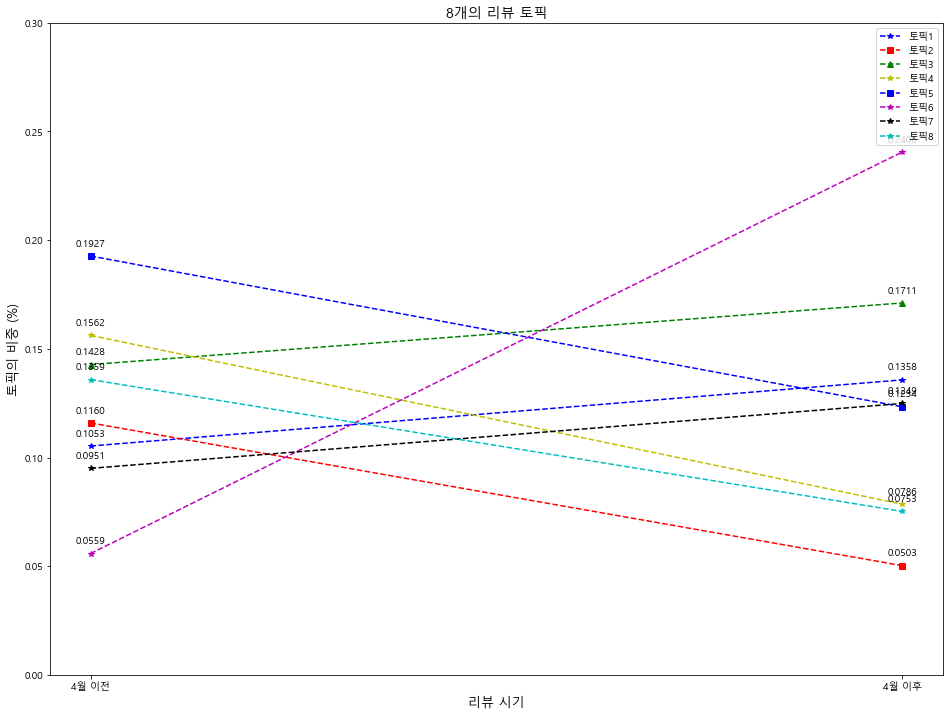

In [120]:
# groupby 오브젝트 생성하기
doctopic_timeslot = dtm_df.groupby('Time')
doctopic_timeslot.groups
# mean() 함수 이용해서 Topic0~TopicN까지의 모든 열 평균 구하기
timeslot_avg = doctopic_timeslot.mean()
timeslot_avg = timeslot_avg.reset_index()   # index 리셋하기
# figure 하나당 4개씩 그래프 그리기
from matplotlib import pyplot as plt
plt.figure(figsize=(16, 12)) 
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic1'], 'b*--', label='토픽1')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic2'], 'rs--', label='토픽2')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic3'], 'g^--', label='토픽3')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic4'], 'y*--', label='토픽4')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic5'], 'bs--', label='토픽5')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic6'], 'm*--', label='토픽6')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic7'], 'k*--', label='토픽7')
plt.plot(timeslot_avg['Time'], timeslot_avg['Topic8'], 'c*--', label='토픽8')


#그래프에서 값 표시하는 annotate 방법 찾기
for topic_id in ['Topic1', 'Topic2', 'Topic3', 'Topic4', 'Topic5', 'Topic6', 
                 'Topic7', 'Topic8']:
    for x, y in zip(range(len(time_slice)), timeslot_avg[topic_id]):
        plt.annotate("%.4f"%y, (x, y), textcoords="offset points", 
                     xytext=(0,10), ha='center')

plt.title("8개의 리뷰 토픽", fontsize=14)
plt.xlabel("리뷰 시기", fontsize=13)
plt.ylabel("토픽의 비중 (%)", fontsize=13)
plt.xticks(timeslot_avg['Time'], ['4월 이전','4월 이후'])
plt.ylim([0.00, 0.3])
plt.legend(loc="best")
plt.savefig("dong100_topic_distribution_graph.png")
plt.show()

#### 비중이 증가한 토픽

In [121]:
from collections import defaultdict
# 단어의 확률 변화를 보고 싶은 topic 번호(인덱스 값이기에 6 -> 5) 
topic_id = 5
# 해당 토픽에서 포함할 단어목록 결정
topic_info = dtm_model.print_topic_times(topic=topic_id, top_terms=10)
topic_dict = defaultdict(list)

#time별 특정 topic(topic_id)의 단어별 확률값.
for dist_inTime in topic_info:
    #time별로 단어와 확률값 저장.
    for word, prob in dist_inTime:
        topic_dict[word].append(prob)

In [122]:
print(topic_dict)

defaultdict(<class 'list'>, {'카드': [0.16704664443331982, 0.16711872023738625], '발급': [0.0825326281435038, 0.08270317575725805], '기존': [0.058417335855077274, 0.05919816890330885], '사용': [0.029613655033596694, 0.02965479460547251], '신규': [0.029147709225020753, 0.029321567330249897], '신청': [0.028139915175136112, 0.02808217901487442], '선불카드': [0.02507293973252013, 0.02519170584171784], '부산시': [0.014966873924257553, 0.015011430514130097], '체크카드': [0.01369689234895556, 0.013729844848377862], '무조건': [0.01253863699814141, 0.012523262418515129]})


#### 비중이 감소한 토픽

In [123]:
from collections import defaultdict
# 단어의 확률 변화를 보고 싶은 topic 번호 
topic_id = 5
# 해당 토픽에서 포함할 단어목록 결정
topic_info = dtm_model.print_topic_times(topic=topic_id, top_terms=10)
topic_dict = defaultdict(list)

#time별 특정 topic(topic_id)의 단어별 확률값.
for dist_inTime in topic_info:
    #time별로 단어와 확률값 저장.
    for word, prob in dist_inTime:
        topic_dict[word].append(prob)

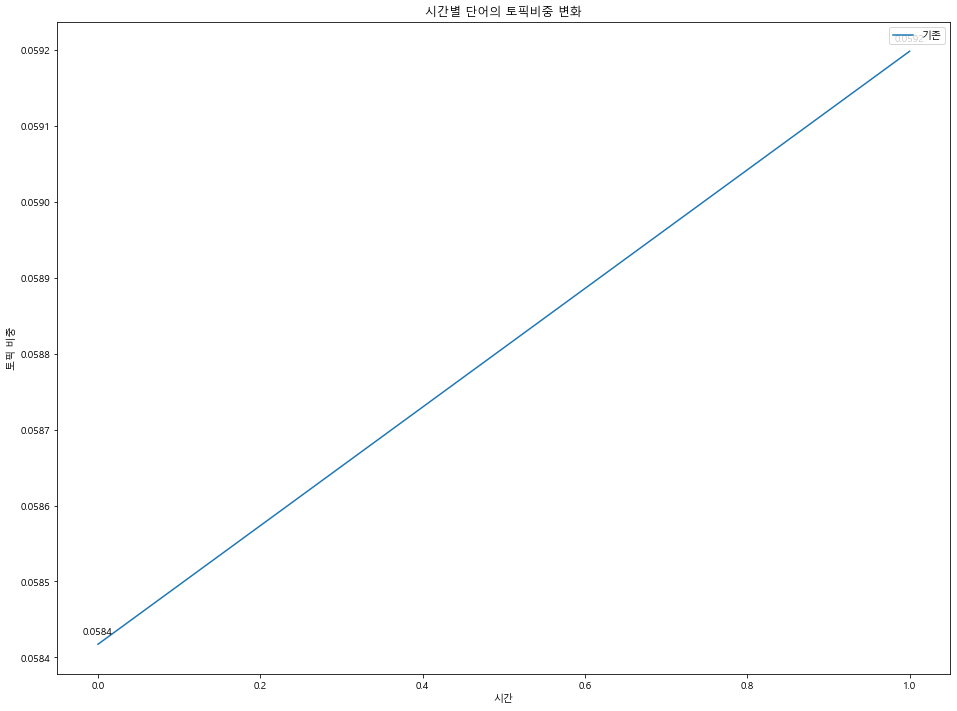

In [124]:
#확률값 추이를 보고싶은 단어 목록
keywords = ["기존"]

# time_slot
t = [i for i in range(len(time_slice))]

plt.figure(figsize=(16, 12))
for keyword in keywords:
    plt.plot(t, topic_dict[keyword], label=keyword)
    
    for x, y in zip(t, topic_dict[keyword]):
         plt.annotate("%.4f"%y, (x, y), textcoords="offset points", 
                      xytext=(0,10), ha='center')

plt.title("시간별 단어의 토픽비중 변화")
plt.xlabel("시간")
plt.ylabel("토픽 비중")
plt.legend(loc='best')
plt.savefig("동백전_keywords_distribution_overtime_graph.png")
plt.show()